In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

### Define function

In [2]:
def DBSCAN(D, eps, MinPts):
    noise_point = list()
    visited_point = list()
    C = list()
    c_n = -1
    for P in D:
        if P in visited_point:
            continue
        visited_point.append(P)
        NeighborPts = regionQuery(P, eps, D)
        if len(NeighborPts) < MinPts:
            noise_point.append(P)
        else:
            C.append(list())
            c_n += 1
            expandCluster(P, NeighborPts, C, c_n, eps, MinPts, D, visited_point)
    return C

In [3]:
def expandCluster(P, NeighborPts, C, c_n, eps, MinPts, D, visited_point):
    C[c_n].append(P)
    for p in NeighborPts:
        if p not in visited_point:
            visited_point.append(p)
            NeighborPts_tmp = regionQuery(p, eps, D)
            if len(NeighborPts_tmp) >= MinPts:
                NeighborPts += NeighborPts_tmp
        if p not in chain.from_iterable(C):
            C[c_n].append(p)

In [4]:
def regionQuery(P, eps, D):
    neighbor = list()
    for p in D:
        if np.sqrt(np.square(P[1] - p[1]) + np.square(P[2] - p[2])) < eps:
            neighbor.append(p)
    return neighbor

In [5]:
def plotCluster(cluster_set):
    for cluster in cluster_set:
        plt.scatter([i[1] for i in cluster], [i[2] for i in cluster])
    plt.show()

### Data preprocessing

In [115]:
data = pd.read_csv('data/Clustering_test5', names=['x', 'y'], delim_whitespace=True)
data_list = list()
for index, row in data.iterrows():
    data_list.append([index, row['x'], row['y']])

### Clustering

In [122]:
C_set = DBSCAN(data_list, 4, 5)

In [123]:
len(C_set) # number of cluster

3

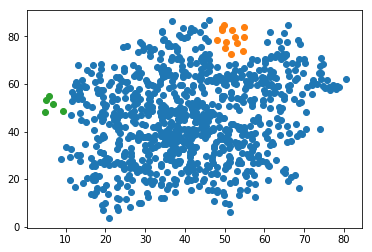

In [125]:
plotCluster(C_set)

### Generate output file (submission file)

In [126]:
result_str = ''
count_of_cluster = 0
for C in C_set:
    count_of_cluster += 1
    for point in C:
        result_str = result_str + str(point[1]) + ' ' + str(point[2]) + ' ' + str(count_of_cluster) + '\n'

In [127]:
result_str

'31.199744088934803 54.730493488693774 1\n33.52905047475977 52.76483039948758 1\n30.986992944665822 53.75585476050549 1\n30.677876060378367 56.125617703910386 1\n28.65568920872226 53.7182330101076 1\n31.125226455587555 52.73992495680394 1\n27.985218067821354 55.173316503449314 1\n33.048788270125215 58.08311862087852 1\n32.21963280978148 56.32725380531736 1\n30.360112303754967 51.25488523939599 1\n34.50618622065485 55.356372863666714 1\n31.389374736878754 49.86543203842352 1\n35.10607723838331 50.52318797005088 1\n31.630028768829234 50.49181746417604 1\n34.52635409581577 51.18648272051172 1\n33.92300919042108 50.48043434288343 1\n35.353224707411115 49.44973620869517 1\n31.71640533477785 50.434715347337075 1\n27.90916839576265 52.16836043520596 1\n26.999866127337054 53.7436195089912 1\n27.01030287682268 54.9229239122443 1\n30.981635079626017 59.988766474868314 1\n30.611560828117852 59.55374836579425 1\n32.274196119377685 59.35920744373283 1\n31.66183684951871 59.51784040969136 1\n27.0841

In [128]:
f = open("output5.txt", "w")
f.write(result_str)
f.close()

## Using hyperparameter

## Clustering_test1 4, 8
## Clustering_test2 5, 10
## Clustering_test3 4, 19
## Clustering_test4 4, 5
## Clustering_test5 4, 5